# 문제

### 변수 정의  
1) MEDV : 주택가격(중앙값)    
2) CRIM : 범죄율    
3) ZN : 주거지 비율   
4) INDUS : 비소매업 비율         
5) CHAS : 강조망 여부(1-조망,0-비조망)    
6) NOX : 산화질소 농도      
7) RM : 주거당 평균 객실 수   
8) AGE : 노후 건물 비율  
9) DIS : 중심지(노동센터) 접근 거리  
10) RAD : 고속도로 접근 편이성 지수    
11) TAX : 재산세율      
12) PTRATIO : 학생당 교수 비율 -->영향 없을 것 같음  
13) B : 흑인 인구 비율     
14) LSTAT : 저소득층 비율  

### 예측 전
CRIM : 범죄율이 낮을수록 집 값이 높을 것이라 생각된다.  
ZN : 주거지 비율이 높을수록 집 값이 높을 것이라고 생각된다.  
INDUS : 비소매업 비율이 낮을수록 집 값이 높을 것이라 생각된다.  
CHAS : 조망권일수록 집 값이 높을 것이라 생각된다.  
NOX : 산화질소 농도는 관련이 없을 것 같다. 산화질소 농도를 매번 체크하고 민감하게 반응하는 사람은 흔하지 않기 때문이다.  
RM : 주거당 평균 객실 수가 많을수록 집 값이 높을 것이라 생각된다. 당연한 이야기이다.  
AGE : 노후 건물 비율이 낮을수록 집값이 높을 것이라 예상된다.  
DIS : 중심지(노동센터) 접근 거리가 가까울수록 집 값이 높을 것이라 예상된다.회사가 집에서 가까운 것이 최고이기 때문이다.  
RAD : 고속도로 접근 편이성 지수가 낮을수록 집 값이 높을 것이라 예상된다. 고속도로 접근 편이성이 높으면 매연 등 좋지 않은 공기와 소음이 발생하기 때문이다.  
TAX : 재산세율이 높을수록 집 값이 높을 것이라고 생각된다. 집 값이 비싸야 세금이 높아지기 때문이다.  
PTRATIO : 학생당 교수 비율은 영향 없을 것 같다.  
B : 흑인 인구 비율이 낮을수록 집 값이 높을 것으로 예상된다. 흑인이 많은 곳은 할렘가 같은 곳이 연상되기 때문이다.  
LSTAT : 저소득층 비율이 낮을수록 집 값이 높을 것으로 예상된다. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import numpy as np
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro 
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
matplotlib.rc('font',family="NanumGothic")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

os.environ["PATH"]+=os.pathsep+"~"
matplotlib.rc('font',family="NanumGothic")

### 진행과정  
1) 데이터 구성 확인  
2) 데이터 전처리

# 데이터 구성 확인 

In [2]:
df_raw=pd.read_csv("BOSTON_HOUSING.csv",engine="python",encoding="CP949")
df_raw.head(5)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [3]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [4]:
# 데이터 결측치 확인 -->이상 없음
df_raw.isna().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca8271950>,
      dtype=object)

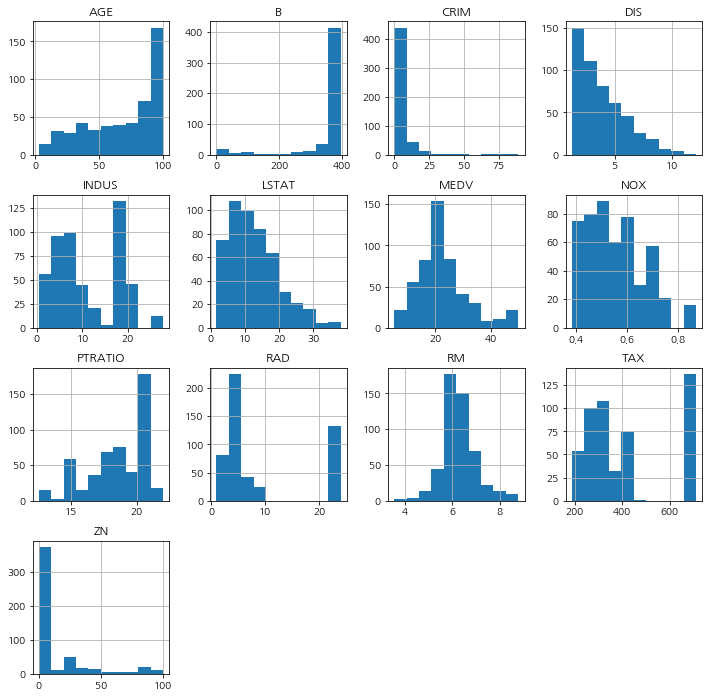

In [96]:
df_raw.hist(figsize=(12,12))

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


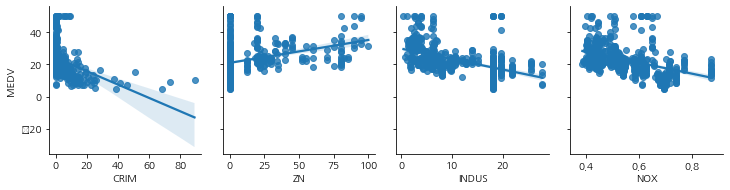

In [7]:
# 데이터 이상치 확인 : Scatter Plot 그리기
sns.pairplot(df_raw,y_vars=["MEDV"],x_vars=["CRIM","ZN","INDUS","NOX"],kind="reg")

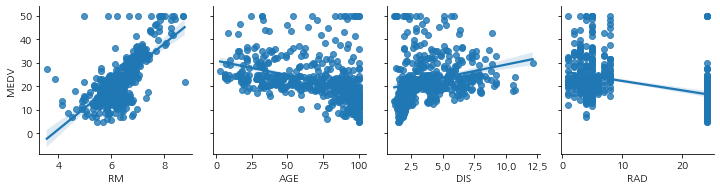

In [8]:
sns.pairplot(df_raw,y_vars=["MEDV"],x_vars=["RM","AGE","DIS","RAD"],kind="reg")

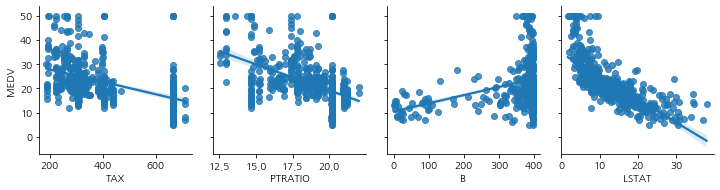

In [9]:
sns.pairplot(df_raw,y_vars=["MEDV"],x_vars=["TAX","PTRATIO","B","LSTAT"],kind="reg")

# 2) 탐색적 데이터 분석

#### 어떤 인사이트를 얻을 수 있는지 잘 모르겠다. 그러니 Histogram을 그려본다.

#### 1) CRIM : 범죄율

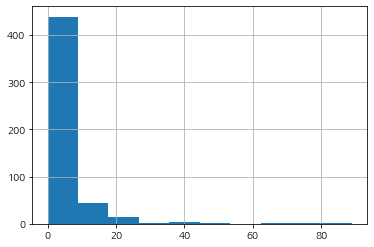

In [10]:
df_raw["CRIM"].hist()
#범죄율이 0~10 에 심하게 몰려있다.
# 계급 구간의 폭을 줄이기,

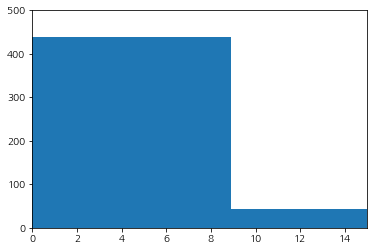

In [11]:
plt.hist(df_raw["CRIM"])
plt.axis([0, 15, 0, 500])
plt.show()                                                               

In [12]:
df_raw["df_CRIM_under"]=df_raw["CRIM"]<7.5
df_raw["df_CRIM_upper"]=df_raw["CRIM"]>=7.5

귀무가설: 범죄율이 높은 지역과 범죄율이 낮은 지역의 주택 가격 평균이 같다.    
대립가설: 범죄율이 높은 지역과 범죄율이 낮은 지역의 주택 가격 평균이 다르다.

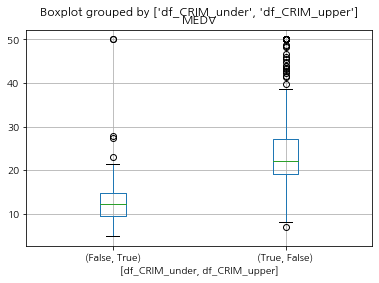

In [13]:
df_raw.boxplot(column="MEDV",by=["df_CRIM_under","df_CRIM_upper"])

범죄율이 낮은 지역의 주택 가격 평균이 높다.

In [14]:
df_rad1=df_raw[df_raw["CRIM"]<10]["MEDV"]
df_rad2=df_raw[df_raw["CRIM"]>=10]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=9.319889480008591, pvalue=3.6333822874473695e-19)
t:9.32
p:0.0


--> P-value가 0.05보다 작으므로 범죄율이 낮을수록 집값이 높다는 대립가설이 유의미하다.

#### * 상관분석  

In [15]:
df_raw_x=df_raw["CRIM"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.388
p-value:0.000


--> CRIM과 MEDV의 상관관계는 -0.388로 상관관계가 약하다. 

#### 2) ZN: 주거지 비율

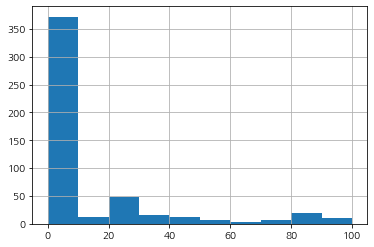

In [16]:
df_raw["ZN"].hist()
#주거지 비율이 0~10에 몰려있다.

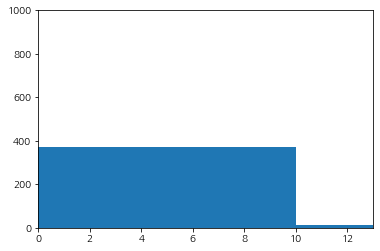

In [17]:
plt.hist(df_raw["ZN"])
plt.axis([0, 13, 0, 1000])
plt.show()

In [18]:
df_raw["df_ZN_under"]=df_raw["ZN"]<10
df_raw["df_ZN_upper"]=df_raw["ZN"]>=10
# df_rad1=df_raw[0<df_raw["ZN"]<=10]["MEDV"]
# df_rad2=df_raw[df_raw["ZN"]>10]["MEDV"]
# print(len(df_rad1),len(df_rad2))

귀무가설: 주거지 비율이 높은 지역과 주거지 비율이 낮은 지역의 주택 가격 평균이 같다.    
대립가설: 주거지 비율이 높은 지역과 주거지 비율이 낮은 지역의 주택 가격 평균이 다르다.

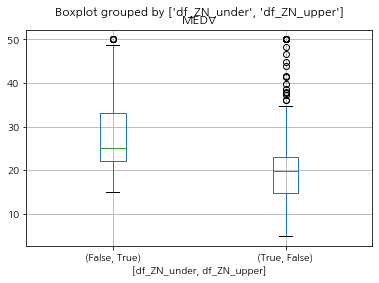

In [19]:
df_raw.boxplot(column="MEDV",by=["df_ZN_under","df_ZN_upper"])

주거지 비율이 높은 지역일수록 주택 가격이 높은 것을 예상할 수 있다.

In [20]:
df_rad1=df_raw[df_raw["ZN"]<10]["MEDV"]
df_rad2=df_raw[df_raw["ZN"]>=10]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-9.038052730869948, pvalue=3.4198247458365273e-18)
t:-9.038
p:0.0


#### * 상관분석

In [21]:
df_raw_x=df_raw["ZN"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:0.360
p-value:0.000


-> ZN 과 MEDV는 0.360으로 약한 상관관계가 있다.

#### 3) INDUS : 비소매업 비율

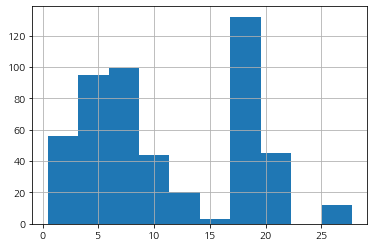

In [22]:
df_raw["INDUS"].hist()
# 골고루 퍼져있어 보인다.

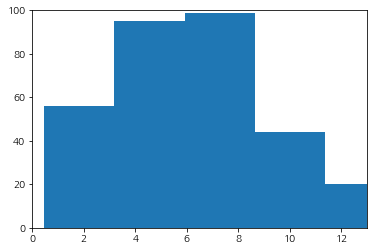

In [23]:
plt.hist(df_raw["INDUS"])
plt.axis([0, 13, 0, 100])
plt.show()

In [24]:
df_raw["df_INDUS_under"]=df_raw["INDUS"]<16
df_raw["df_INDUS_upper"]=df_raw["INDUS"]>=16

귀무가설: 비소매율이 높은 지역과 비소매율이 낮은 지역의 주택 가격 평균이 같다.  
대립가설: 비소매율이 높은 지역과 비소매율이 낮은 지역의 주택 가격 평균이 다르다.

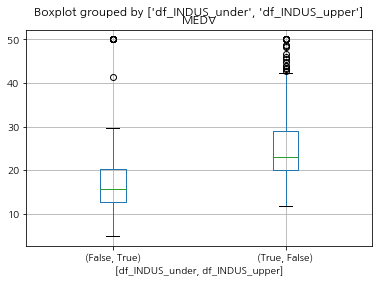

In [25]:
df_raw.boxplot(column="MEDV",by=["df_INDUS_under","df_INDUS_upper"])

비소매율이 낮은 지역이 주택 가격이 높다는 것을 예상할 수 있다.

In [26]:
df_rad1=df_raw[df_raw["INDUS"]<16]["MEDV"]
df_rad2=df_raw[df_raw["INDUS"]>=16]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=10.16319606676023, pvalue=3.3702023559466714e-22)
t:10.163
p:0.0


--> P-value가 0.05보다 작으므로 비소매업비율이 높을수록 집값이 높다.

#### * 상관분석

In [27]:
df_raw_x=df_raw["INDUS"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.484
p-value:0.000


-> INDUS 와 MEDV는 -0.484으로 음의 상관관계가 있다.

#### 4)CHAS : 강조망 여부(1-조망,0-비조망)

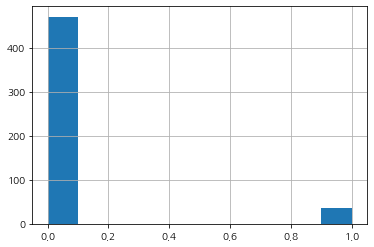

In [28]:
df_raw["CHAS"].hist() #범주형 데이터

귀무가설: 비조망과 조망의 주택가격 평균이 같다.    
대립가설: 비조망과 조망의 주택가격 평균이 다르다.  

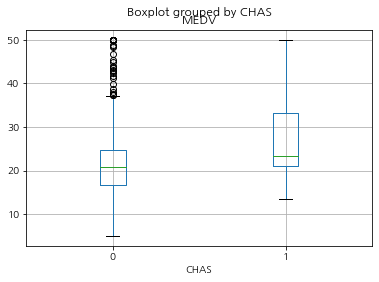

In [29]:
df_raw.boxplot(column="MEDV",by="CHAS")

비조망이면 집 값이 높다.

In [30]:
t_result=stats.ttest_ind(df_raw["CHAS"]==0,df_raw["CHAS"]==1)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=53.96009489490948, pvalue=8.757522855106094e-300)
t:53.96
p:0.0


-----> 조망권과 비조망권의 차이가 유의미한다고 나왔지만, 데이터셋 자체의 비조망권의 개수는 471개로 무수히 많고, 조망권의 개수는 35개 적다. 불균형한 데이터셋이라고 판단하여 결과는 믿을 수 없다는 결론을 냈다.

#### *상관분석

In [31]:
df_raw_x=df_raw["CHAS"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:0.175
p-value:0.000


--> CHAS과 MEDV의 상관관계는 0.175로 상관관계가 약하다.

#### 5) NOX : 산화질소 농도

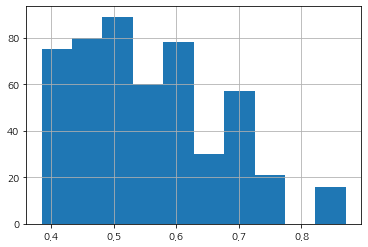

In [32]:
df_raw["NOX"].hist()

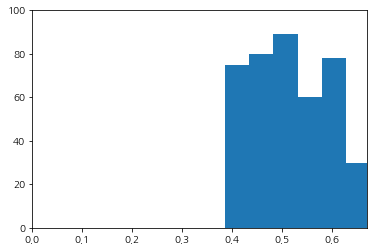

In [33]:
plt.hist(df_raw["NOX"])
plt.axis([0, 0.67,0,100])
plt.show()

In [34]:
df_raw["df_NOX_under"]=df_raw["NOX"]<0.52
df_raw["df_NOX_upper"]=df_raw["NOX"]>=0.52

귀무가설: 산화질소 농도가 높은 집단의 주택 가격 평균과 산화질소 농도가 낮은 집단의 주택가격 평균이 같다.  
대립가설: 산화질소 농도가 높은 집단의 주택 가격 평균과 산화질소 농도가 낮은 집단의 주택가격 평균이 다르다.

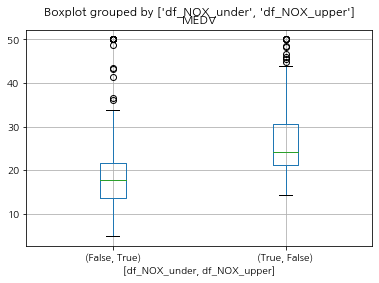

In [35]:
df_raw.boxplot(column="MEDV",by=["df_NOX_under","df_NOX_upper"])

산화질소 농도가 적을수록 집값이 높다

In [36]:
df_rad1=df_raw[df_raw["NOX"]<0.5]["MEDV"]
df_rad2=df_raw[df_raw["NOX"]>=0.4]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=5.54308112666087, pvalue=4.2352484884514224e-08)
t:5.543
p:4.24e-08


----> P-value가 0.05보다 작으므로 산화질소 농도가 0.5보다 작을수록 집값이 높다.

#### *상관분석

In [37]:
df_raw_x=df_raw["NOX"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.427
p-value:0.000


--> NOX와 MEDV의 상관관계는 -0.427로 음의 상관관계가 있다.

####  6) RM : 주거당 평균 객실 수

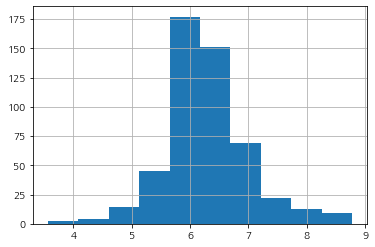

In [38]:
df_raw["RM"].hist()

In [39]:
df_raw["df_RM_under"]=df_raw["RM"]<6.2
df_raw["df_RM_upper"]=df_raw["RM"]>=6.2

귀무가설: 주거당 평균 객실 수가 많은 집단의 주택 가격 평균과 주거당 평균 객실 수가 적은 집단의 주택가격 평균이 같다.  
대립가설: 주거당 평균 객실 수가 많은 집단의 주택 가격 평균과 주거당 평균 객실 수가 적은 집단의 주택가격 평균이 다르다.

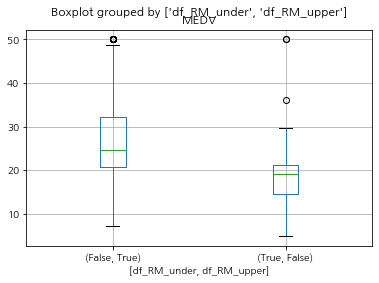

In [40]:
df_raw.boxplot(column="MEDV",by=["df_RM_under","df_RM_upper"])

주거당 평균 객실 수가 적을수록 집값이 낮다.

In [41]:
df_rad1=df_raw[df_raw["RM"]<6.2]["MEDV"]
df_rad2=df_raw[df_raw["RM"]>=6.2]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-11.732459745145503, pvalue=2.850535845980495e-28)
t:-11.732
p:0.0


----> P-value가 0.05보다 작으므로 주거당 평균 객실 수가 6.2보다 작을수록 집값이 낮다.

#### *상관분석

In [42]:
df_raw_x=df_raw["RM"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:0.695
p-value:0.000


--> RM과 MEDV의 상관관계는 0.695로 양의 상관관계가 있다.

#### 7) AGE : 노후 건물 비율

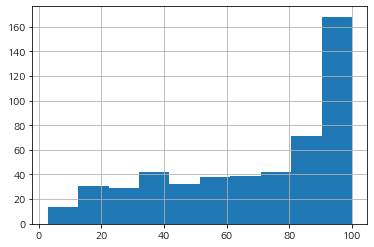

In [43]:
df_raw["AGE"].hist()

In [44]:
df_raw["df_AGE_under"]=df_raw["AGE"]<95
df_raw["df_AGE_upper"]=df_raw["AGE"]>=95

귀무가설: 노후 건물 비율이 높은 집단의 주택 가격 평균과 노후 건물 비율이 낮은 집단의 주택가격 평균이 같다.  
대립가설: 노후 건물 비율이 높은 집단의 주택 가격 평균과 노후 건물 비율이 낮은 집단의 주택가격 평균이 다르다.

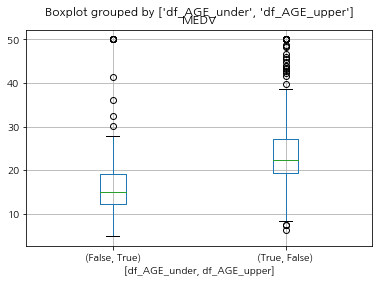

In [45]:
df_raw.boxplot(column="MEDV",by=["df_AGE_under","df_AGE_upper"])

노후 건물 비율이 낮을수록 집단의 주택가격 평균이 높다.

In [46]:
df_rad1=df_raw[df_raw["AGE"]<90]["MEDV"]
df_rad2=df_raw[df_raw["AGE"]>=90]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=8.093983771830333, pvalue=4.359012441225016e-15)
t:8.094
p:0.0


----> P-value가 0.05보다 작으므로 노후 건물 비율이 90보다 작을수록 집값이 높다.

#### * 상관분석

In [47]:
df_raw_x=df_raw["AGE"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.377
p-value:0.000


--> AGE와 MEDV의 상관관계는 -0.377로 상관관계가 약하다.

#### 8) DIS : 중심지(노동센터) 접근 거리

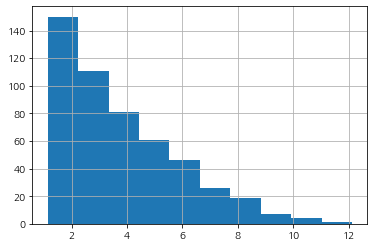

In [48]:
df_raw["DIS"].hist()

음의 상관관계가 뚜렷히 보인다. 중심지 접근 거리가 멀수록 집값이 낮다. 

In [49]:
df_raw["df_DIS_under"]=df_raw["DIS"]<2
df_raw["df_DIS_upper"]=df_raw["DIS"]>=2

귀무가설: 중심지(노동센터) 접근 거리가 먼 집단의 주택 가격 평균과 중심지(노동센터) 접근 거리가 가까운 집단의 주택가격 평균이 같다.  
대립가설: 중심지(노동센터) 접근 거리가 먼 집단의 주택 가격 평균과  중심지(노동센터) 접근 거리가 가까운 집단의 주택가격 평균이 다르다.

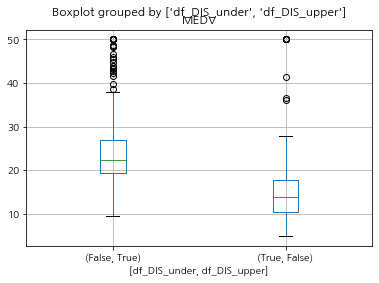

In [50]:
df_raw.boxplot(column="MEDV",by=["df_DIS_under","df_DIS_upper"])

In [51]:
df_rad1=df_raw[df_raw["DIS"]<2]["MEDV"]
df_rad2=df_raw[df_raw["DIS"]>=2]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-7.785196453373674, pvalue=3.98329830151541e-14)
t:-7.785
p:0.0


----> P-value가 0.05보다 작으므로 중심지(노동센터) 접근 거리가 4보다 높을 때, 집 값이 올라간다.

#### *상관분석

In [52]:
df_raw_x=df_raw["DIS"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:0.250
p-value:0.000


--> AGE와 MEDV의 상관관계는 0.25로 상관관계가 약하다.

#### 9) RAD : 고속도로 접근 편이성 지수 

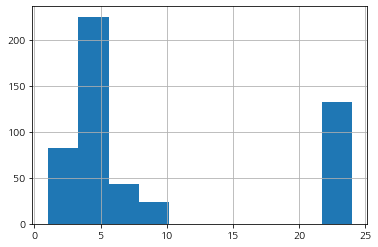

In [53]:
df_raw["RAD"].hist()

In [54]:
df_raw["df_rad_under"]=df_raw["RAD"]<20
df_raw["df_rad_upper"]=df_raw["RAD"]>=20

귀무가설: 고속도로 접근 편이성 지수가 높은 집단의 주택 가격 평균과 고속도로 접근 편이성 지수이 낮은 집단의 주택가격 평균이 같다.    
대립가설: 고속도로 접근 편이성 지수가 높은 집단의 주택 가격 평균과 고속도로 접근 편이성 지수이 낮은 집단의 주택가격 평균이 다르다.

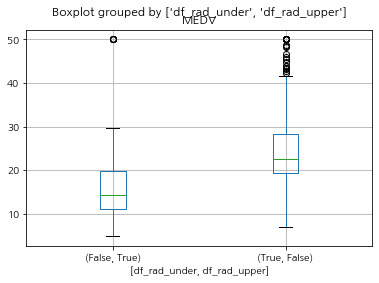

In [55]:
df_raw.boxplot(column="MEDV",by=["df_rad_under","df_rad_upper"])

In [56]:
df_rad1=df_raw[df_raw["RAD"]<24]["MEDV"]
df_rad2=df_raw[df_raw["RAD"]>=24]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=9.690255282930414, pvalue=1.7778936162464715e-20)
t:9.69
p:0.0


---> P값이 0.05보다 훨씬 작으므로 고속도로 접근 편의성에 따라 차이가 있다. BOXPLOT으로 본 결과, 고속도록 접근성이 24보다 낮으면, 주택 가격이 높다. 

#### *상관분석

In [57]:
df_raw_x=df_raw["RAD"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.382
p-value:0.000


--> RAD와 MEDV의 상관관계는 -0.382로 상관관계가 약하다.

####  10) TAX : 재산세율 

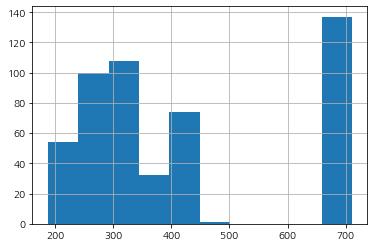

In [58]:
df_raw["TAX"].hist()

In [59]:
df_raw["df_tax_under"]=df_raw["TAX"]<600
df_raw["df_tax_upper"]=df_raw["TAX"]>=600

귀무가설: 재산세율이 적은 집단의 주택 가격 평균과 재산세율이 많은 집단의 주택가격 평균이 같다.  
대립가설: 재산세율이 많은 집단의 주택 가격 평균과 재산세율이 많은 집단의 주택가격 평균이 다르다.

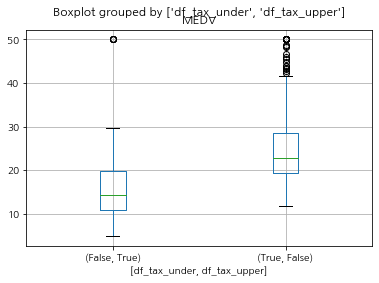

In [60]:
df_raw.boxplot(column="MEDV",by=["df_tax_under","df_tax_upper"])

재산세율이 높을수록, 주택 가격 평균이 낮다.

In [61]:
df_rad1=df_raw[df_raw["TAX"]<600]["MEDV"]
df_rad2=df_raw[df_raw["TAX"]>=600]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=10.245571183482726, pvalue=1.6682534285380135e-22)
t:10.246
p:0.0


---->P값이 0.05보다 훨씬 작으므로 재산율에 따라 주택가격이 차이가 있다. BOXPLOT으로 본 결과, 세금률이 높을수록, 주택 가격이 낮다.   
 결과가 유의미한다고 나왔지만, 데이터셋 자체의 600 이상은 약 150개로 적고, 600미만은 350개로 많다. 불균형한 데이터셋이라고 판단하는 기준은 이보다 확연한 차이가 나야하므로 불균형한 데이터라는 판단은 하지 않았다. 

#### * 상관분석

In [62]:
df_raw_x=df_raw["TAX"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.469
p-value:0.000


--> TAX와 MEDV의 상관관계는 -0.469로 음의 상관관계가 있다.

#### 11) PTRATIO : 학생당 교수 비율 -->영향 없을 것 같음

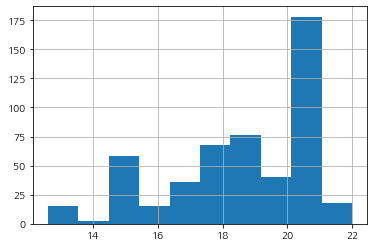

In [63]:
df_raw["PTRATIO"].hist()

In [64]:
df_raw["df_PTRATIO_under"]=df_raw["PTRATIO"]<20
df_raw["df_PTRATIO_upper"]=df_raw["PTRATIO"]>=20

귀무가설: 학생당 교수 비율 적은 집단의 주택 가격 평균과 학생당 교수 비율이 많은 집단의 주택가격 평균이 같다.   
대립가설: 학생당 교수 비율이 많은 집단의 주택 가격 평균과 학생당 교수 비율이 많은 집단의 주택가격 평균이 다르다.

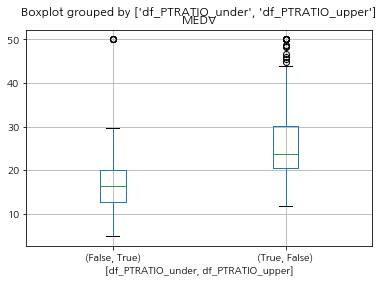

In [65]:
df_raw.boxplot(column="MEDV",by=["df_PTRATIO_under","df_PTRATIO_upper"])

학생당 교수 비율이 작을수록 집 값이 높다는 것을 예상할 수 있다.

In [66]:
df_rad1=df_raw[df_raw["PTRATIO"]<20]["MEDV"]
df_rad2=df_raw[df_raw["PTRATIO"]>=20]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=12.766967231954494, pvalue=1.5395704416719087e-32)
t:12.767
p:0.0


---> P값이 0.05보다 훨씬 작으므로 학생당 교수 비율에 따라 주택가격이 차이가 있다. 학생당 교수 비율이 작을수록 집 값이 높다. 상식적으로는 학생당 교수 비율이 높아야 좋은 학군이고, 집값이 높을 것이라 예측되는데 다시 생각해보니 좋은 학교일수록 학생수가 무수히 많다. 그러므로 학생당 교수 비율이 적을수록 집 값이 높다는 인사이트를 얻었다.

#### *상관분석

In [67]:
df_raw_x=df_raw["PTRATIO"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.508
p-value:0.000


--> PTRATIO와 MEDV의 상관관계는 -0.508로 음의 상관관계가 있다.

In [97]:
df_raw.corr()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,-0.468536,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


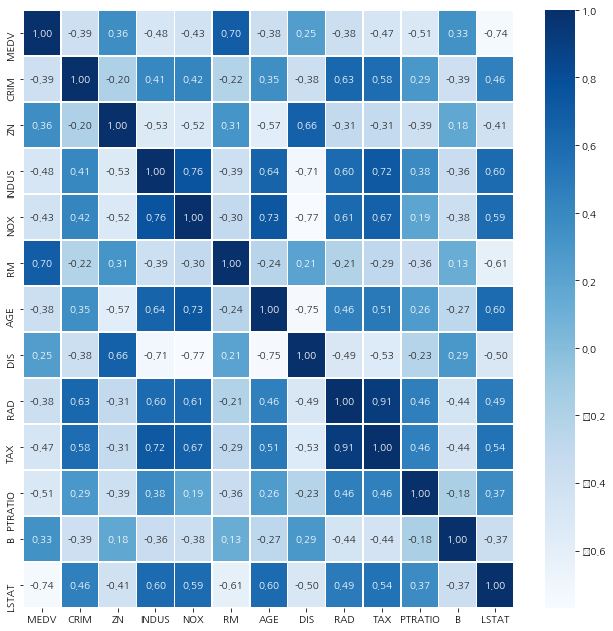

In [99]:
plt.figure(figsize=(11,11))
sns.heatmap(data = df_raw.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


#### 12) B : 흑인 인구 비율

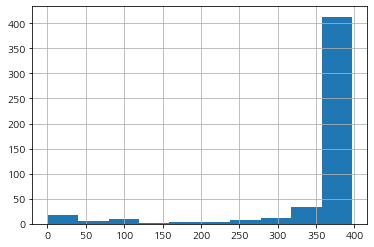

In [68]:
df_raw["B"].hist()

In [69]:
# df_b1: 흑인이 많은 동네, df_b2 : 백인이 많은 동네 
df_b1=df_raw[df_raw["B"]>200]["MEDV"]
df_b2=df_raw[df_raw["B"]<=200]["MEDV"]

귀무가설: 흑인이 많은 집단의 주택 가격 평균과 백인이 많은 집단의 주택가격 평균이 같다.  
대립가설: 흑인이 많은 집단의 주택 가격 평균과 백인이 많은 집단의 주택가격 평균이 다르다.

In [70]:
#B1은 흑인이 많은 주택 비율, B2은 백인이 많은 주택 비율
df_raw["B1"]=df_raw["B"]>200
df_raw["B2"]=df_raw["B"]<=200

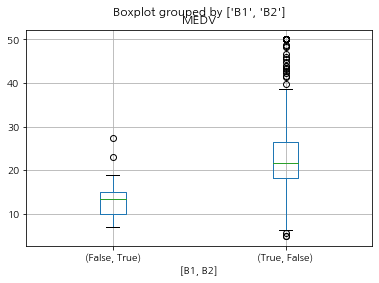

In [71]:
df_raw.boxplot(column="MEDV",by=["B1","B2"])

흑인의 비율이 많은 집단이 주택 가격이 높다는 것을 예측할 수 있다.

In [72]:
t_result=stats.ttest_ind(df_b1,df_b2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=6.9537681869602785, pvalue=1.107587290213691e-11)
t:6.954
p:0.0


----> p-value가 0.001보다도 작으므로 두 집단의 차이가 존재한다고 할 수 있고, box plot을 통해 흑인이 많은 집단의 집 값이 더 비싸다는 인사이트를 얻었다. 

#### * 상관분석

In [73]:
df_raw_x=df_raw["B"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:0.333
p-value:0.000


--> B와 MEDV의 상관관계는 0.333로 약한 상관관계가 있다.

#### 13) LSTAT : 저소득층 비율

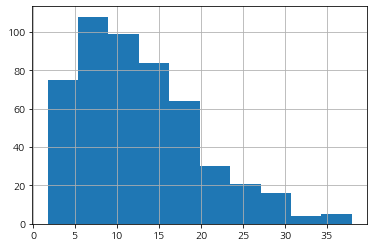

In [74]:
df_raw["LSTAT"].hist()

In [75]:
df_raw["df_LSTAT_under"]=df_raw["LSTAT"]<13
df_raw["df_LSTAT_upper"]=df_raw["LSTAT"]>=13

귀무가설: 저소득층이 적은 집단의 주택 가격 평균과 저소득층이 많은 집단의 주택가격 평균이 같다.  
대립가설: 저소득층이 많은 집단의 주택 가격 평균과 저소득층이 많은 집단의 주택가격 평균이 다르다.

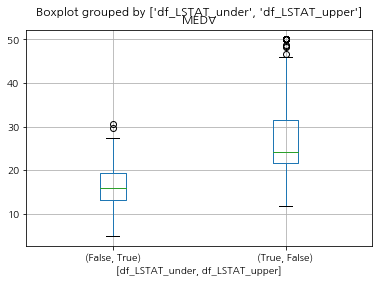

In [76]:
df_raw.boxplot(column="MEDV",by=["df_LSTAT_under","df_LSTAT_upper"])

저소득층이 적은 집단의 주택 가격이 높다는 것을 예측할 수 있다.

In [77]:
df_rad1=df_raw[df_raw["LSTAT"]<13]["MEDV"]
df_rad2=df_raw[df_raw["LSTAT"]>=13]["MEDV"]
t_result=stats.ttest_ind(df_rad1,df_rad2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)


print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=17.33503792100815, pvalue=3.822699603682325e-53)
t:17.335
p:0.0


----> p-value가 0.001보다도 작으므로 두 집단의 차이가 존재한다고 할 수 있고, box plot을 통해 저소득층 비율이 적을수록 집 값이 더 비싸다는 인사이트를 얻었다.

#### *  상관분석 

In [78]:
df_raw_x=df_raw["LSTAT"]
df_raw_y=df_raw["MEDV"]

corr,pval=stats.pearsonr(df_raw_x,df_raw_y)

print("Correlation Ananlysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Ananlysis
corr:-0.738
p-value:0.000


--> LSTAT와 MEDV의 상관관계는 -0.738로 음의 상관관계가 있다.

# 여러가지 분석법

# 1) 다중회귀분석

In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

### 1-1) 데이터 불러오기 (CHAS(조망권) 열 삭제)

In [80]:
df_raw=pd.read_csv("BOSTON_HOUSING.csv",engine="python",encoding="CP949")
df_raw.drop(["CHAS"],axis=1,inplace=True)
df_raw.head()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


### 1-2) 모델의 적합성 확인(결정계수 확인을 통한 모델의 설명력 확인)

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


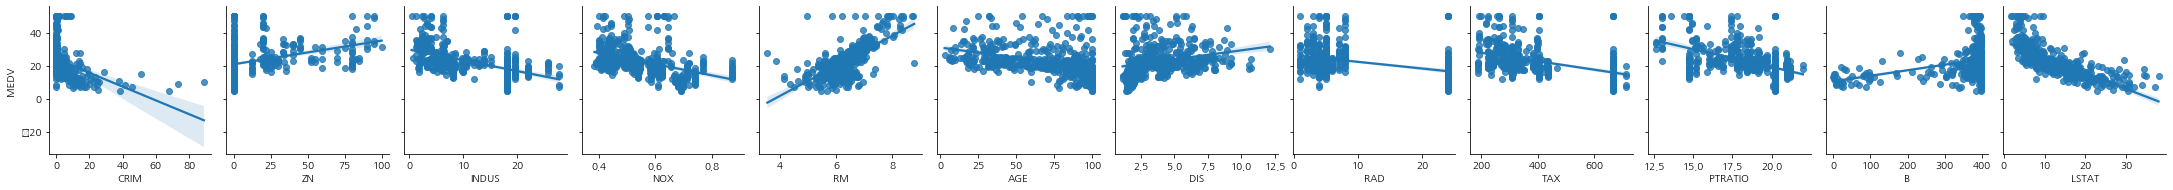

In [81]:
sns.pairplot(df_raw,y_vars="MEDV",x_vars=["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"],kind="reg")

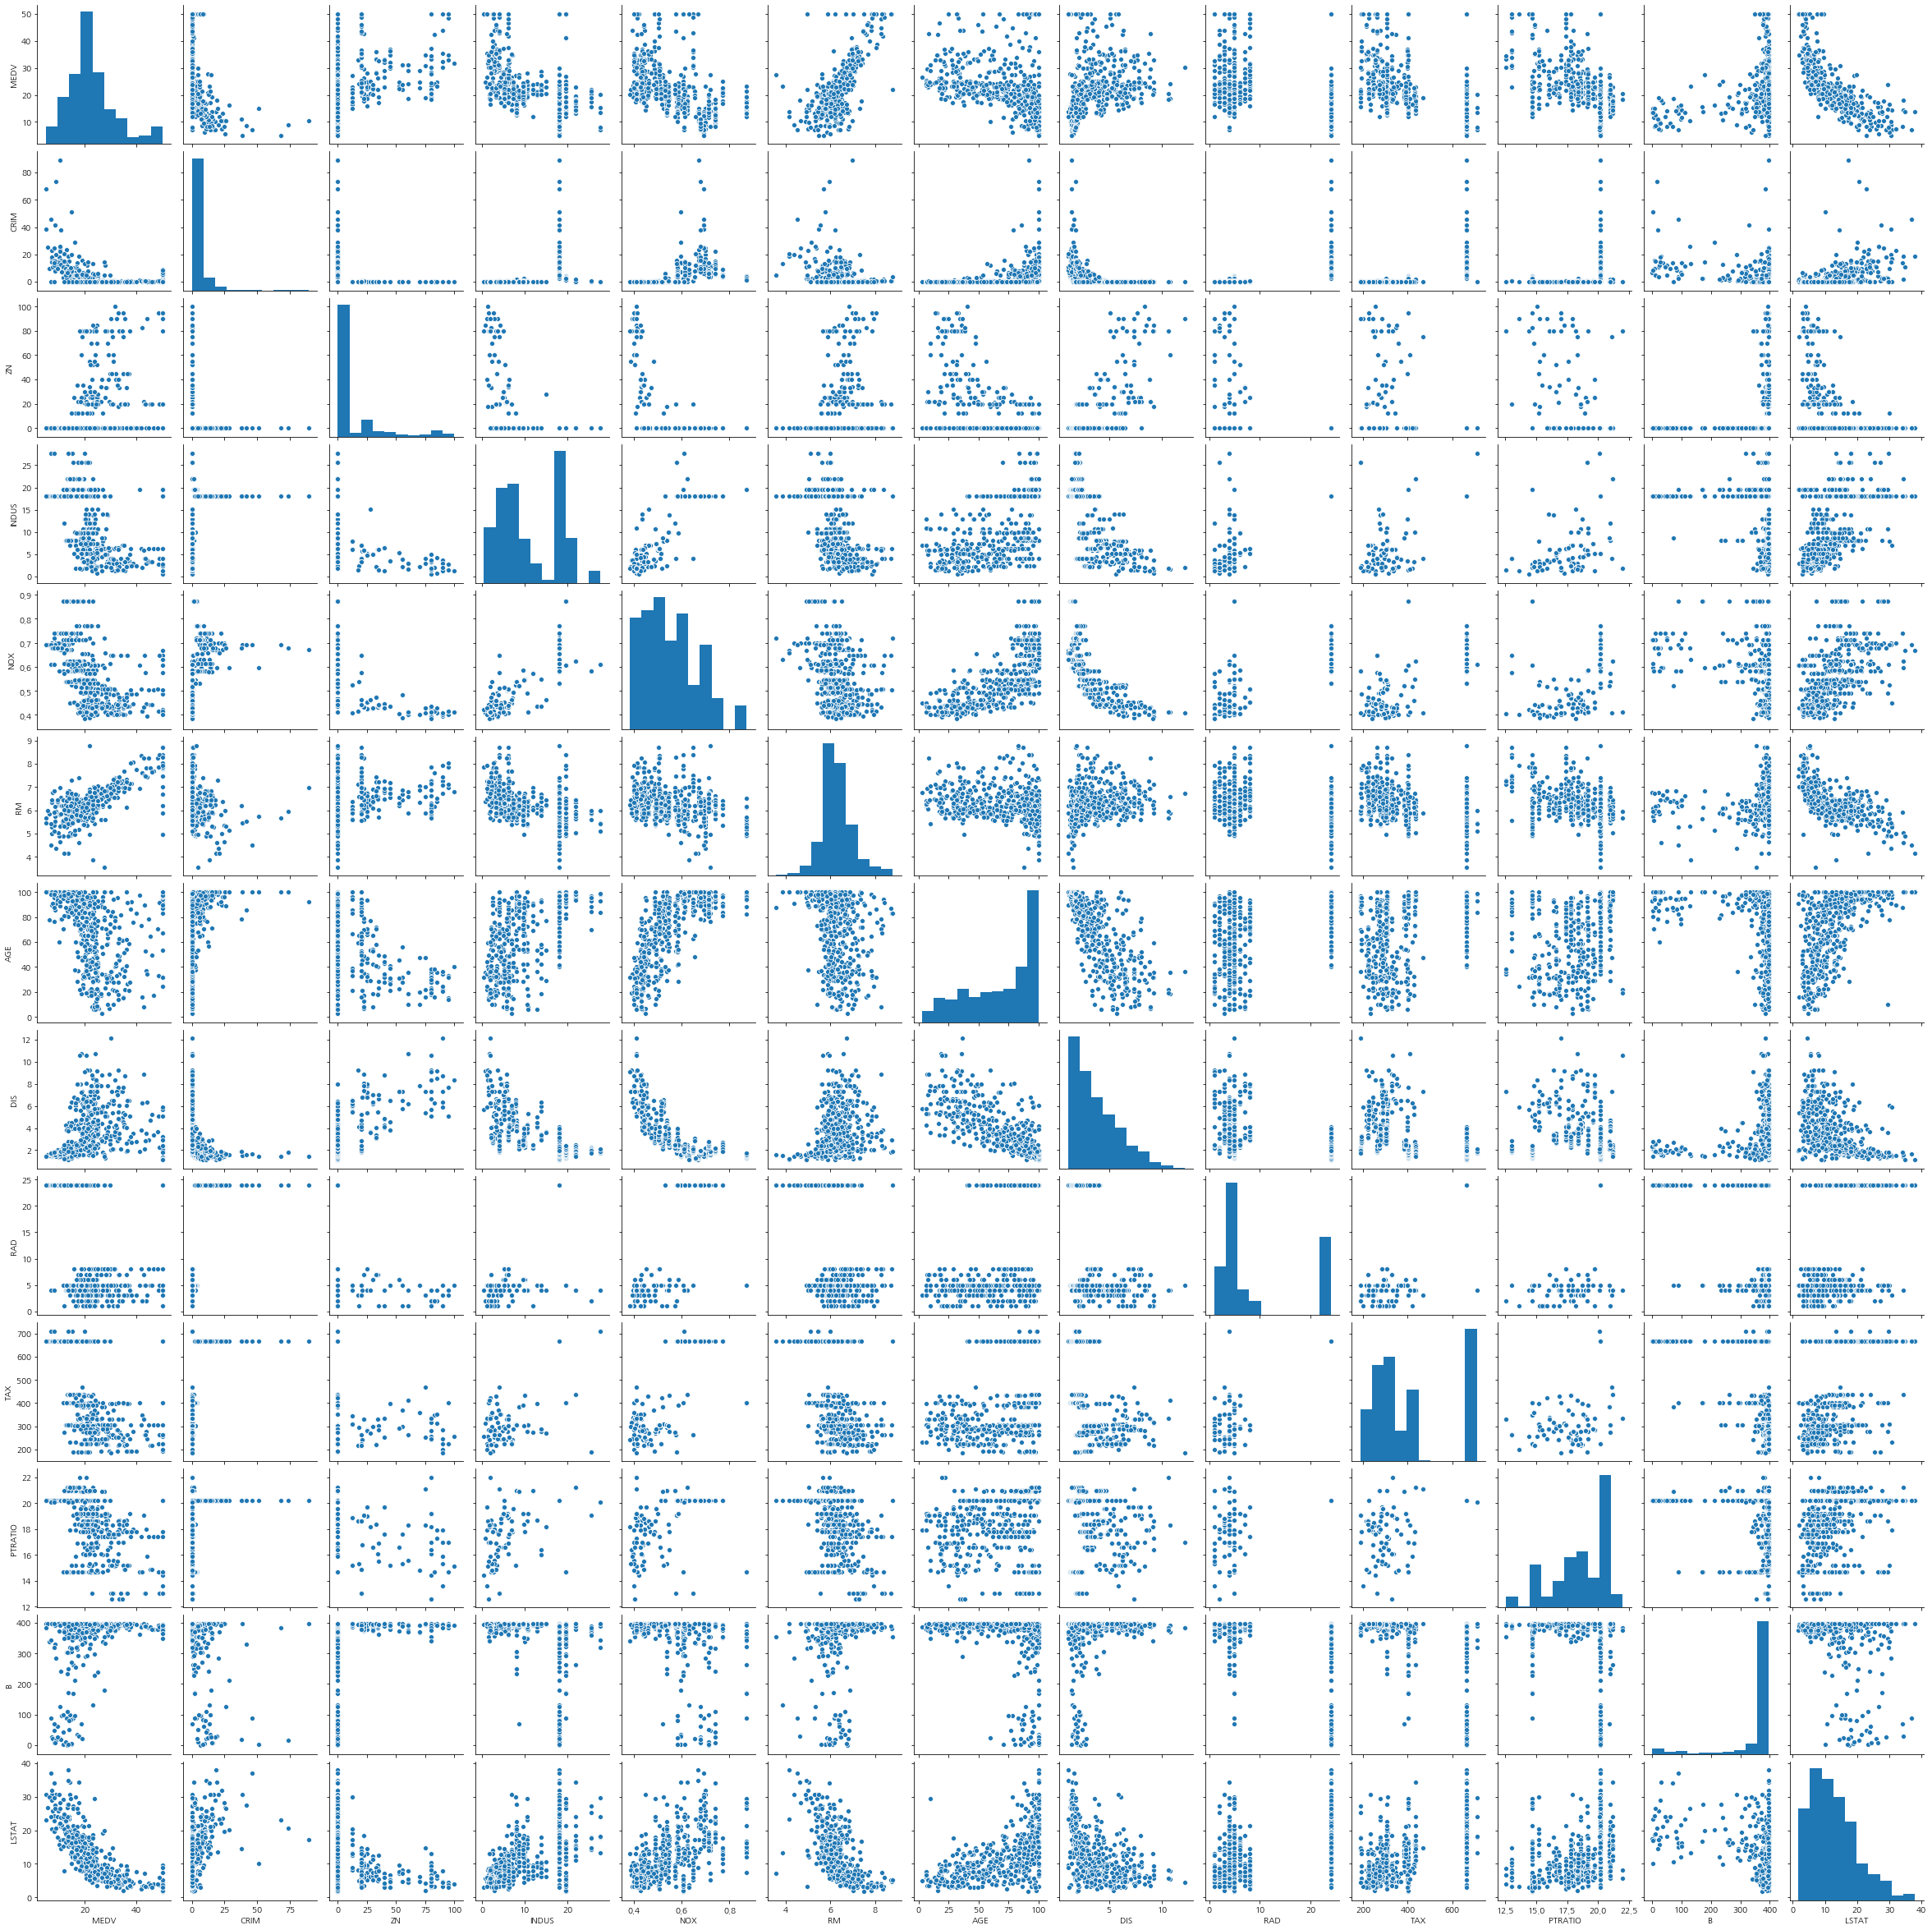

In [82]:
#산점도 행렬: 전체 숫자형 변수
sns.pairplot(df_raw)

In [83]:
df_raw.corr().round(3)
# TAX와 RAD가 다중공선성이 보임

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
NOX,-0.427,0.421,-0.517,0.764,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489
TAX,-0.469,0.583,-0.315,0.721,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544


### 1-3) 회귀 모델 생성: 설명변수 전체

In [84]:
reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          7.30e-134
Time:                        22:30:12   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

#### 설명변수 전체를 확인한 후 알게 된 사실   
: 분석결과 p 값이 유의수준 0.05보다 작으므로 회귀모델로서 유의한 변수는 CRIM, ZN , NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT이다.      

### 1-4) 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [85]:
#설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_x=df_raw.drop("MEDV",axis=1)

#statsmodels의 상수항 추가 함수 적용
df_x_const=add_constant(df_x)

#DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]

#VIF 정렬
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
11,B,1.345
10,PTRATIO,1.783
1,CRIM,1.788
5,RM,1.932
2,ZN,2.298
12,LSTAT,2.931
6,AGE,3.093
3,INDUS,3.949
7,DIS,3.955
4,NOX,4.389


#### 다중공선성을 확인한 결과   
모든 변수들은 VIF값이 모두 낮다.결론적으로 다중공선성이 보이지 않는다.

### 1-5) 후진제거법을 이용한 변수 선택: p값이 큰 것 부터 차례로 제거한다.

In [86]:
#p값이 가장 큰 AGE제거 
# df_raw.drop(['AGE'],axis=1,inplace=True)

reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + INDUS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          6.52e-135
Time:                        22:30:12   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     494   BIC:                             3082.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8025      5.124      7.183      0.0

In [87]:
#p값이 가장 큰 INDUS제거 

reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          6.70e-136
Time:                        22:30:13   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      5.113      7.162      0.0

MEDV=36.6203+-0.1141CRIM+0.0457ZN+-16.4692NOX+3.8446RM-1.5261DIS+0.3155RAD-0.0127TAX-0.9784PTRATIO+0.0097B+-0.5281LSTAT

#### p값이 0.05이상인 것들을 제거한 결과

1) p 값이 0.05이상인 INDUS, AGE을 제거했으나 더빈왓슨이 1.011이기 때문에 잔차들은 양의 상관관계가 있다고 할 수 있다.   
2) 이를 없애는 방법으로 '주성분분석'을 하여 중요한 변수를 뽑아본다.  
3) 상관분석에서 값이 낮게 나온 변수인 "ZN"(0.36),"DIS"(0.25),"CRIM"(-0.388),"NOX"(-0.427),"INDUS"(-0.484)를 제거하고 다시 생각해본다.  
4) "ZN"(0.36),"DIS"(0.25),"CRIM"(-0.388),"NOX"(-0.427),"INDUS"(-0.484)를 제거하여도 R-squaired 값은 늘어나지 않고, 줄어든다.   
5) 가장 R-squaired가 가장 크도록 하는 변수는 CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT이다.        
6) 하지만, Durbin-Watson 값이 1.011이기 때문에 잔차가 독립적이지 않고,  Prob(JB) 0.05 보다 작으므로 잔차의 정규성이 성립하지 않는다.    
7) 변수를 줄이거나 제거하여도 잔차의 독립성, 정규성, 등분산성이 성립하지 않는다.   

### 1-6) scaling을 하면 결과가 달라지는지 알아본다. (잔차의 독립성, 등분산성, 정규성이 성립하는지.)

In [88]:
df_raw_y=df_raw["MEDV"]
df_raw_x=df_raw.drop(["MEDV"],axis=1)

In [89]:
# 변수 이름 저장
x_cols = df_raw_x.columns

#
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled Data : {}".format(nd_scaled[:5].round(3)))
print("Shape : {}".format(nd_scaled.shape))


Scaled Data : [[-0.42   0.285 -1.288 -0.144  0.414 -0.12   0.14  -0.983 -0.667 -1.459
   0.441 -1.076]
 [-0.417 -0.488 -0.593 -0.74   0.194  0.367  0.557 -0.868 -0.987 -0.303
   0.441 -0.492]
 [-0.417 -0.488 -0.593 -0.74   1.283 -0.266  0.557 -0.868 -0.987 -0.303
   0.396 -1.209]
 [-0.417 -0.488 -1.307 -0.835  1.016 -0.81   1.078 -0.753 -1.106  0.113
   0.416 -1.362]
 [-0.412 -0.488 -1.307 -0.835  1.229 -0.511  1.078 -0.753 -1.106  0.113
   0.441 -1.027]]
Shape : (506, 12)


In [90]:
df_scaled = pd.DataFrame(nd_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [91]:
#df_raw.columns
df_scaled.columns = df_raw_x.columns
df_scaled

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [92]:
df_scaled['MEDV'] = df_raw['MEDV']
df_scaled # scaled df 완성

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.000000
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439,21.600000
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727,34.700001
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.400002
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.400000
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.600000
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.900000
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.000000


### 1-7) scaling된 모델에 후진제거법 진행

In [93]:
reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          7.30e-134
Time:                        22:30:13   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

In [94]:
#1) AGE 제거
reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + INDUS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          6.52e-135
Time:                        22:30:13   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     494   BIC:                             3082.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8025      5.124      7.183      0.0

In [95]:
# INDUS제거
reg_model=smf.ols(formula="MEDV~ CRIM+ ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_raw)
#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          6.70e-136
Time:                        22:30:13   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      5.113      7.162      0.0

#### P값이 0.05 이하인 것을 모두 제거한 결과 

1) p 값이 0.05이상인 INDUS, AGE을 제거했으나 더빈왓슨이 1.011이기 때문에 잔차들은 양의 상관관계가 있다고 할 수 있다.      
2) 상관분석에서 값이 낮게 나온 변수인 "ZN"(0.36),"DIS"(0.25),"CRIM"(-0.388),"NOX"(-0.427),"INDUS"(-0.484)를 제거하고 다시 생각해본다.    
4) "ZN"(0.36),"DIS"(0.25),"CRIM"(-0.388),"NOX"(-0.427),"INDUS"(-0.484)를 제거하여도 R-squaired 값은 늘어나지 않고, 줄어든다.     
5) 가장 R-squaired가 가장 크도록 하는 변수는 CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT이다.          
6) 하지만, Durbin-Watson 값이 1.011이기 때문에 잔차가 독립적이지 않고,  Prob(JB) 0.05 보다 작으므로 잔차의 정규성이 성립하지 않는다.    
7) 변수를 줄이거나 제거하여도 잔차의 독립성, 정규성, 등분산성이 성립하지 않는다.   

## 결론  
1) 이 데이터는 잔차의 등분산성, 독립성, 정규성이 성립하지 않으므로 다중선형회귀 모델을 사용할 수 없다.  
2) 이론적으로는 사용할 수 없다고 배우나 현업에서 종사하신 분들을 인터뷰한 결과, 회귀모델은 coefficient 값으로 각 변수가 끼치는 영향을 숫자로 알 수 있기 때문에 사용하기 좋은 모델링이라고 한다.    
3) 이러한 이유로 잔차의 독립성, 정규성, 등분산성이 성립하지 않아도 사용한다. 